<a href="https://colab.research.google.com/github/roilhi/MetNum_ITECI_2020/blob/gh-pages/EspinalLeonardo_TrabajoFinalMetNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de Ensenada

**Curso de Métodos Numéricos**

*Repaso y Programación de algunos métodos vistos*
Leonardo Espinal

Unidad 1: Raíces de ecuaciones

In [1]:
# Primero importamos las librerías necesarias
import numpy as np # Librería numérica
import sympy # Procesamiento simbólico
import matplotlib.pyplot as plt # Librería para las gráficas

Cálculo del error relativo porcentual, nos servirá para todos los métodos.
$$\epsilon_r = \left \lvert \frac {V_r-Vn}{Vn} \right \rvert \times 100$$

In [2]:
# Función que calcule el error relativo porcentual
def ErrorRelativo (vreal, vnum):
  epsilon = abs((vreal-vnum)/vreal)*100
  return epsilon

*   Método de bisección

Estimar la raíz de la función $f(x)=x-\cos(x)$ en el intervalo $[0.5, 1]$


In [3]:
# Valores iniciales
a =0.5
b =1
Vanalítico =0.73909
def fx(x_int):
  fx = x_int-np.cos(x_int)
  return fx

In [4]:
numIter = 0
N = int(input('Defina un número N de iteraciones'))
x_old =0
while numIter<N:
  x_i = (a+b)/2
  if fx(a)*fx(x_i)<0:
    b = x_i
  elif fx(a)*fx(x_i)==0:
    raizAproxBisec = x_i
  else:
    a = x_i
  numIter = numIter+1
  raizAproxBisec = x_i
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("La raíz estimada por el método de bisección es =",+raizAproxBisec, "iteración i =",+numIter)
  print("El error relativo es =",+ErrorBisec, "iteración i =",+numIter)

Defina un número N de iteraciones5
La raíz estimada por el método de bisección es = 0.75 iteración i = 1
El error relativo es = 100.0 iteración i = 1
La raíz estimada por el método de bisección es = 0.625 iteración i = 2
El error relativo es = 20.0 iteración i = 2
La raíz estimada por el método de bisección es = 0.6875 iteración i = 3
El error relativo es = 9.090909090909092 iteración i = 3
La raíz estimada por el método de bisección es = 0.71875 iteración i = 4
El error relativo es = 4.3478260869565215 iteración i = 4
La raíz estimada por el método de bisección es = 0.734375 iteración i = 5
El error relativo es = 2.127659574468085 iteración i = 5


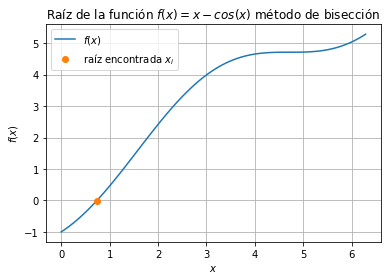

In [5]:
# Datos para la graficación
ejeX = np.linspace(0,2*np.pi,101)
# Graficando la función
plt.plot(ejeX,fx(ejeX), label='$f(x)$')
# Graficar la raíz encontrada en el método
plt.plot(raizAproxBisec,fx(raizAproxBisec), 'o', label= 'raíz encontrada $x_i$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Raíz de la función $f(x)=x-cos(x)$ método de bisección')
plt.legend() # Muestra la leyenda
plt.grid() # Muestra la cuadrícula
plt.show() # Muestra la gráfica

Unidad 2: Interpolación Numérica



*   Regresión numérica por mínimo cuadrado


Dada la serie de puntos $(x_1,y_1),(x_2,y_2),...,(x_n),(y_n)$

La función de ajuste es una línea recta $y= a_0+a_1^x+e$

Donde: $a_0$ es el cruce con el eje de las "y" de la recta (ordenada de orígen)

a_1 es la pendiente o la inclinación de la recta

"e" es el error o diferencia entre el modelo (ajuste) y las observaciones (datos)

In [6]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
 
# Generador de distribución de datos para regresión lineal simple
def generador_datos_simple(beta, muestras, desviacion):
# Genero n (muestras) valores de x aleatorios entre 0 y 100
x = np.random.random(muestras)* 100
# Genero un error aleatorio gaussiano con desviación típica (desviacion)
e = np.random.randn(muestras) * desviacion
# Obtengo el y real como x*beta + error
y = x * beta + e
return x.reshape((muestras,1)), y.reshape((muestras,1))
 
# Parámetros de la distribución
desviacion = 200
beta = 10
n = 50
x, y = generador_datos_simple(beta, n, desviacion)
 
# Represento los datos generados
plt.scatter(x, y)
plt.show()

IndentationError: ignored

In [7]:
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(x, y)
# Ahora puedo obtener el coeficiente b_1
print u'Coeficiente beta1: ', modelo.coef_[0]
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(x)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2
print u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred)
print u'Estadístico R_2: %.2f' % r2_score(y, y_pred)
Coeficiente beta1:  [ 9.89500401]
Error cuadrático medio: 22140.95
Estadístico R_2: 0.79
ver códigoimprimir?
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
x_real = np.array([0, 100])
y_real = x_real*beta
plt.plot(x_real, y_real, color='green')
plt.show()

SyntaxError: ignored

Unidad 3: Integración y diferenciación numérica.



*   Método del trapecio simple



Se tiene cuando la función polinomios que aproxima a Newton-Cotes es un polinomio de orden 1 (lineal).

Regla del trapecio:

$I≈(b-a)\frac {f(a)+f(b)} {2}$

In [8]:
def f(x):
  return (x*x)

  def trapecio_simple (a,b):
    if (b>a):
      return 0.5*(f(a)+f(b))*(b-a)

    def trapecio_compuesto (a,b):
      i=a
      h=1E-6
      area= 0.0
      while (i<=b):
        if (i+h<=b):
          area = area+trapecio_simple(i,i+h)
          i= i+h
          return area

          if __name__ == "__main__":
            print ("Area =") +str(trapecio_simple(0,1))

Unidad 4: Sistema de ecuaciones lineales.



*   Método de eliminación de Gauss Jordan.

Demostrar que $x=1, y=1, z=2$ son las soluciones del sistema de ecuaciones lineales.

$x+y-2z= -2$

$y+3z = 7$

 $x-z = -1$


In [9]:
# Método de Gauss-Jordan
# Solución a Sistemas de Ecuaciones

import numpy as np

# INGRESO DE VALORES
A = np.array([[1,1,-2],
              [0,1,3],
              [1,0,-1]])

B = np.array([[-2],
              [7],
              [-1]])

# PROCEDIMIENTO
casicero = 1e-15 # Considerar como 0
# Evitar truncamiento en operaciones
A = np.array(A,dtype=float) 

# Matriz aumentada
AB = np.concatenate((A,B),axis=1)
AB0 = np.copy(AB)

# Pivoteo parcial por filas
tamano = np.shape(AB)
n = tamano[0]
m = tamano[1]

# Para cada fila en AB
for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna = abs(AB[i:,i])
    dondemax = np.argmax(columna)
    
    # dondemax no está en diagonal
    if (dondemax !=0):
        # intercambia filas
        temporal = np.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal
AB1 = np.copy(AB)

# eliminacion hacia adelante
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i+1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = np.copy(AB)

# elimina hacia atras
ultfila = n-1
ultcolumna = m-1
for i in range(ultfila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    # diagonal a unos
    AB[i,:] = AB[i,:]/AB[i,i]
X = np.copy(AB[:,ultcolumna])
X = np.transpose([X])


# SALIDA
print('Matriz aumentada:')
print(AB0)
print('Pivoteo parcial por filas')
print(AB1)
print('eliminacion hacia adelante')
print(AB2)
print('eliminación hacia atrás')
print(AB)
print('solución de X: ')
print(X)

Matriz aumentada:
[[ 1.  1. -2. -2.]
 [ 0.  1.  3.  7.]
 [ 1.  0. -1. -1.]]
Pivoteo parcial por filas
[[ 1.  1. -2. -2.]
 [ 0.  1.  3.  7.]
 [ 1.  0. -1. -1.]]
eliminacion hacia adelante
[[ 1.  1. -2. -2.]
 [ 0.  1.  3.  7.]
 [ 0.  0.  4.  8.]]
eliminación hacia atrás
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 2.]]
solución de X: 
[[1.]
 [1.]
 [2.]]


Se demostró que $x=1, y=1, z=2$